# Spark Random Forest Implementation

## Chicago Crime Use Case

You are provided with the dataset that contains the crime records from Chicago. The dataset belongs to Chicago Police Department. This dataset reflects reported incidents of crime that occurred in the City of Chicago from 2012 to 2017. The data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

## Dataset Understanding

## Objective: 

Our objective is to use the information and try to come up with a system that classifies the **FBI Code** for each crime absed on the given information.

Columns in the Dataset:

**ID** - Unique identifier for the record.

**Case Number** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

**Date** - Date when the incident occurred. this is sometimes a best estimate.

**Block** - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

**IUCR** - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description.

**Primary Type** - The primary description of the IUCR code.

**Description** - The secondary description of the IUCR code, a subcategory of the primary description.

**Location Description** - Description of the location where the incident occurred.

**Arrest** - Indicates whether an arrest was made.

**Domestic** - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

**Beat** - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.

**District** - Indicates the police district where the incident occurred.

**Ward** - The ward (City Council district) where the incident occurred.

**Community Area** - Indicates the community area where the incident occurred. Chicago has 77 community areas.

**FBI Code** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).

**X Coordinate** - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**Y Coordinate** - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**Year** - Year the incident occurred.

**Updated On** - Date and time the record was last updated.

**Latitude** - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**Longitude** - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**Location** - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

### Initialising the Spark session

In [1]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
         }
}

In [2]:
from pyspark import SparkContext, SparkConf

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1659502917520_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc = SparkContext.getOrCreate();
sc

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-2>

Listing all installed packages 

In [4]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.3    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     1.0.1    
lxml                       4.6.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.1    
pytz                       2021.1   
PyYAML                     5.4.1    
regex                      2021.3.17
setuptools                 28.8.0   
six                        1.13.0   
tqdm                       4.59.0   
wheel                      0.29.0   
windmill                   1.6

In [5]:
sc.install_pypi_package("pandas==0.25.1")
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86

In [6]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.3    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.11.0   
jmespath                   0.10.0   
joblib                     1.0.1    
kiwisolver                 1.4.4    
lxml                       4.6.2    
matplotlib                 3.1.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     0.25.1   
pip                        9.0.1    
py-dateutil                2.2      
pyparsing                  3.0.9    
python-dateutil            2.8.2    
python37-sagemaker-pyspark 1.4.1    
pytz                       2021.1   
PyYAML                     5.4.1    
regex                      2021.3.17
setuptools                 28.8.0   
six                        1.13.0   
tqdm                       4.59.0   
t

### Loading the dataset

In [7]:
df = spark.read.csv("s3a://chicago-crime-mlc/Chicago_Crimes_2012_to_2017.csv", 
                    header = True, 
                    inferSchema = False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
# Printing the first row
df.head(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(_c0='3', ID='10508693', Case Number='HZ250496', Date='05/03/2016 11:40:00 PM', Block='013XX S SAWYER AVE', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='APARTMENT', Arrest='True', Domestic='True', Beat='1022', District='10.0', Ward='24.0', Community Area='29.0', FBI Code='08B', X Coordinate='1154907.0', Y Coordinate='1893681.0', Year='2016', Updated On='05/10/2016 03:56:50 PM', Latitude='41.864073157', Longitude='-87.706818608', Location='(41.864073157, -87.706818608)')]

In [9]:
# Schema of the dataset
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- _c0: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)

In [10]:
# Count total no of rows
df.count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1456714

In [11]:
# print 5 rows
df.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(_c0='3', ID='10508693', Case Number='HZ250496', Date='05/03/2016 11:40:00 PM', Block='013XX S SAWYER AVE', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='APARTMENT', Arrest='True', Domestic='True', Beat='1022', District='10.0', Ward='24.0', Community Area='29.0', FBI Code='08B', X Coordinate='1154907.0', Y Coordinate='1893681.0', Year='2016', Updated On='05/10/2016 03:56:50 PM', Latitude='41.864073157', Longitude='-87.706818608', Location='(41.864073157, -87.706818608)'), Row(_c0='89', ID='10508695', Case Number='HZ250409', Date='05/03/2016 09:40:00 PM', Block='061XX S DREXEL AVE', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='RESIDENCE', Arrest='False', Domestic='True', Beat='313', District='3.0', Ward='20.0', Community Area='42.0', FBI Code='08B', X Coordinate='1183066.0', Y Coordinate='1864330.0', Year='2016', Updated On='05/10/2016 03:56:50 PM', Latitude='41.782921527', Longi

In [12]:
# Show 5 rows in tabular format
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|_c0|      ID|Case Number|                Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+---+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|  3|10508693|   HZ250496|05/03/2016 11:40:...| 013XX S SAWYER AVE|0486|             BATTERY|DOMESTIC BATTERY ...| 

In [13]:
# get all columns
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['_c0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']

### Data Exploration and Cleaning

In [14]:
df.select("Date").show(10, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+
|Date                  |
+----------------------+
|05/03/2016 11:40:00 PM|
|05/03/2016 09:40:00 PM|
|05/03/2016 11:31:00 PM|
|05/03/2016 10:10:00 PM|
|05/03/2016 10:00:00 PM|
|05/03/2016 10:35:00 PM|
|05/03/2016 10:30:00 PM|
|05/03/2016 09:30:00 PM|
|05/03/2016 04:00:00 PM|
|05/03/2016 10:30:00 PM|
+----------------------+
only showing top 10 rows

In [15]:
# Column type
df.select("Date").dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Date', 'string')]

Date is string data type, convert to timestamp format

In [16]:
# Changing the type of column Date to timestamp
from pyspark.sql.functions import to_timestamp


df = df.withColumn("Date_Time",to_timestamp('Date',"MM/dd/yyyy hh:mm:ss a"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df.select("Date_Time").show(10, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|Date_Time          |
+-------------------+
|2016-05-03 23:40:00|
|2016-05-03 21:40:00|
|2016-05-03 23:31:00|
|2016-05-03 22:10:00|
|2016-05-03 22:00:00|
|2016-05-03 22:35:00|
|2016-05-03 22:30:00|
|2016-05-03 21:30:00|
|2016-05-03 16:00:00|
|2016-05-03 22:30:00|
+-------------------+
only showing top 10 rows

In [18]:
df.select("Date_Time").dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Date_Time', 'timestamp')]

### Extracting 'hour' from the dataset

In [19]:
from pyspark.sql.functions import hour

df = df.withColumn('hour', hour(df["Date_Time"]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df.select('hour').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+
|hour|
+----+
|  23|
|  21|
|  23|
|  22|
|  22|
+----+
only showing top 5 rows

### Extract day of week from date in pyspark

In [21]:
from pyspark.sql.functions import dayofweek

# create a new column for dayofweek from Date_Time

df = df.withColumn('day_of_week', dayofweek(df["Date_Time"]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
df.select('day_of_week').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|day_of_week|
+-----------+
|          3|
|          3|
|          3|
|          3|
|          3|
+-----------+
only showing top 5 rows

### Show 'hour' & 'day_of_week'

In [23]:
df.select('hour','day_of_week').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------+
|hour|day_of_week|
+----+-----------+
|  23|          3|
|  21|          3|
|  23|          3|
|  22|          3|
|  22|          3|
+----+-----------+
only showing top 5 rows

In [24]:
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----+-----------+
|_c0|      ID|Case Number|                Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|          Date_Time|hour|day_of_week|
+---+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----+-----------+
|  3

In [25]:
# Dropping the columns: Date & Date_Time
df = df.drop('Date', 'Date_Time')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------+-----------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+----+-----------+
|_c0|      ID|Case Number|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|hour|day_of_week|
+---+--------+-----------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+----+-----------+
|  3|10508693|   HZ250496| 013XX S SAWYER AVE|0486|             BATTERY|DOMESTIC BATTERY ...|           APARTMENT|  True|    Tr

### Hours- statistical analysis

In [27]:
# In each hour, how many crimes happened

df.groupBy('hour').count().show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|hour|count|
+----+-----+
|  12|83930|
|   1|43771|
|   6|24609|
|   3|31048|
|   4|23325|
|   8|50637|
|  11|67005|
|  19|84193|
|  23|61224|
|  21|76543|
+----+-----+
only showing top 10 rows

In [28]:
# Storing in a pandas dataframe for visualisation 
# store in descending order
hour_df = df.groupBy('hour').count().orderBy('count',ascending=False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# print 10 rows
hour_df.head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   hour  count
0    19  84193
1    12  83930
2    18  82414
3    20  80826
4    15  79930
5    21  76543
6    16  76065
7    22  75824
8    17  75556
9    14  73698

In [30]:
# import matplotlib 
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### What time of the day are criminals the busiest?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

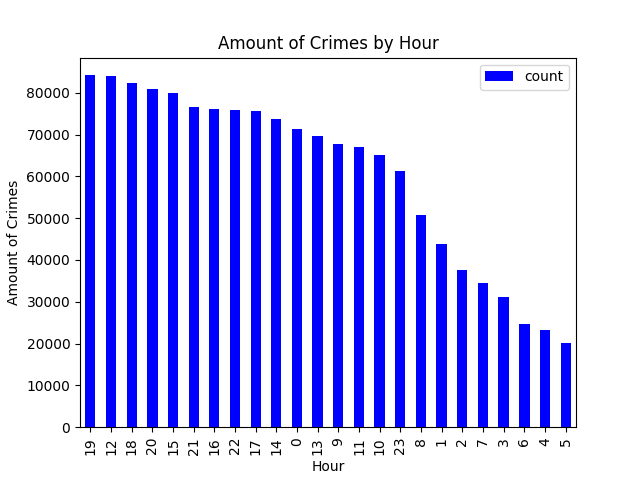

In [31]:

# create the plot
plt.figure(figsize=(14,10))

# Plot Crime data for hour
hour_df.plot(x='hour', y='count', kind='bar', color='blue')

plt.title('Amount of Crimes by Hour')
plt.ylabel('Amount of Crimes')
plt.xlabel('Hour')


# display the plot
%matplot plt


### Day of week statistical analysis

In [32]:
df.groupBy("day_of_week").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|day_of_week| count|
+-----------+------+
|          1|202212|
|          6|218643|
|          3|206129|
|          4|208374|
|          5|205851|
|          2|205762|
|          7|209743|
+-----------+------+

In [33]:
dayofweek_df = df.groupBy("day_of_week").count().orderBy("count", ascending = False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
dayofweek_df.head(7)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   day_of_week   count
0            6  218643
1            7  209743
2            4  208374
3            3  206129
4            5  205851
5            2  205762
6            1  202212

### which day of the week ciminals are busiest?

(1- Sunday , 2- Monday …… 7- Saturday)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

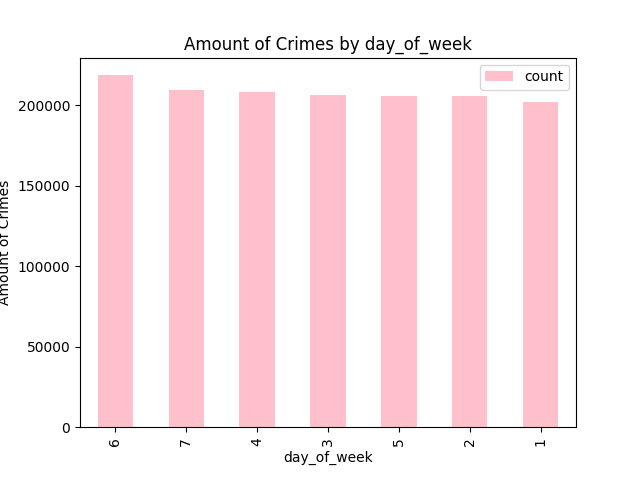

In [35]:
# create the plot
plt.figure(figsize=(14,10))


dayofweek_df.plot(x = 'day_of_week', y = 'count', kind='bar', color = "pink")


plt.title('Amount of Crimes by day_of_week')
plt.ylabel('Amount of Crimes')
plt.xlabel('day_of_week')


# display the plot
%matplot plt


### year statistical analysis

In [36]:
df.groupBy("Year").count().show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------+
|Year| count|
+----+------+
|2014|274527|
|2015|262995|
|2016|265462|
|2012|335670|
|2017| 11357|
|2013|306703|
+----+------+

In [37]:
year_df = df.groupBy("year").count().orderBy("count", ascending = False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
year_df.head(7)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   year   count
0  2012  335670
1  2013  306703
2  2014  274527
3  2016  265462
4  2015  262995
5  2017   11357

### how no of crimes are changing over the years

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

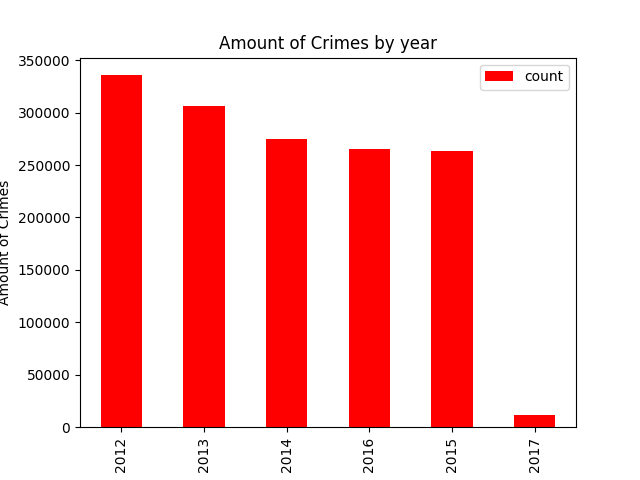

In [39]:

# create the plot
plt.figure(figsize=(14,10))


year_df.plot(x = 'year', y = 'count', kind='bar', color = "red")


plt.title('Amount of Crimes by year')
plt.ylabel('Amount of Crimes')
plt.xlabel('year')


# display the plot
%matplot plt


### Primary Type statistical analysis

In [40]:
df.groupBy("Primary Type").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|           OBSCENITY|   187|
|             BATTERY|263700|
|            HOMICIDE|  2649|
|         SEX OFFENSE|  4885|
|PUBLIC PEACE VIOL...| 13122|
|             ASSAULT| 91289|
| CRIM SEXUAL ASSAULT|  6823|
|  DECEPTIVE PRACTICE| 75495|
|            BURGLARY| 83397|
|INTERFERENCE WITH...|  6195|
|            STALKING|   828|
|NON-CRIMINAL (SUB...|     4|
|            GAMBLING|  2212|
|   CRIMINAL TRESPASS| 36912|
| MOTOR VEHICLE THEFT| 61138|
|CONCEALED CARRY L...|    90|
|        NON-CRIMINAL|    93|
|               THEFT|329460|
|             ROBBERY| 57313|
|     CRIMINAL DAMAGE|155455|
+--------------------+------+
only showing top 20 rows

In [41]:
primarytype_df = df.groupBy("Primary Type").count().orderBy("count", ascending = False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
primarytype_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      Primary Type   count
0            THEFT  329460
1          BATTERY  263700
2  CRIMINAL DAMAGE  155455
3        NARCOTICS  135240
4          ASSAULT   91289

### Primary Types of crime which is mostly reported 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

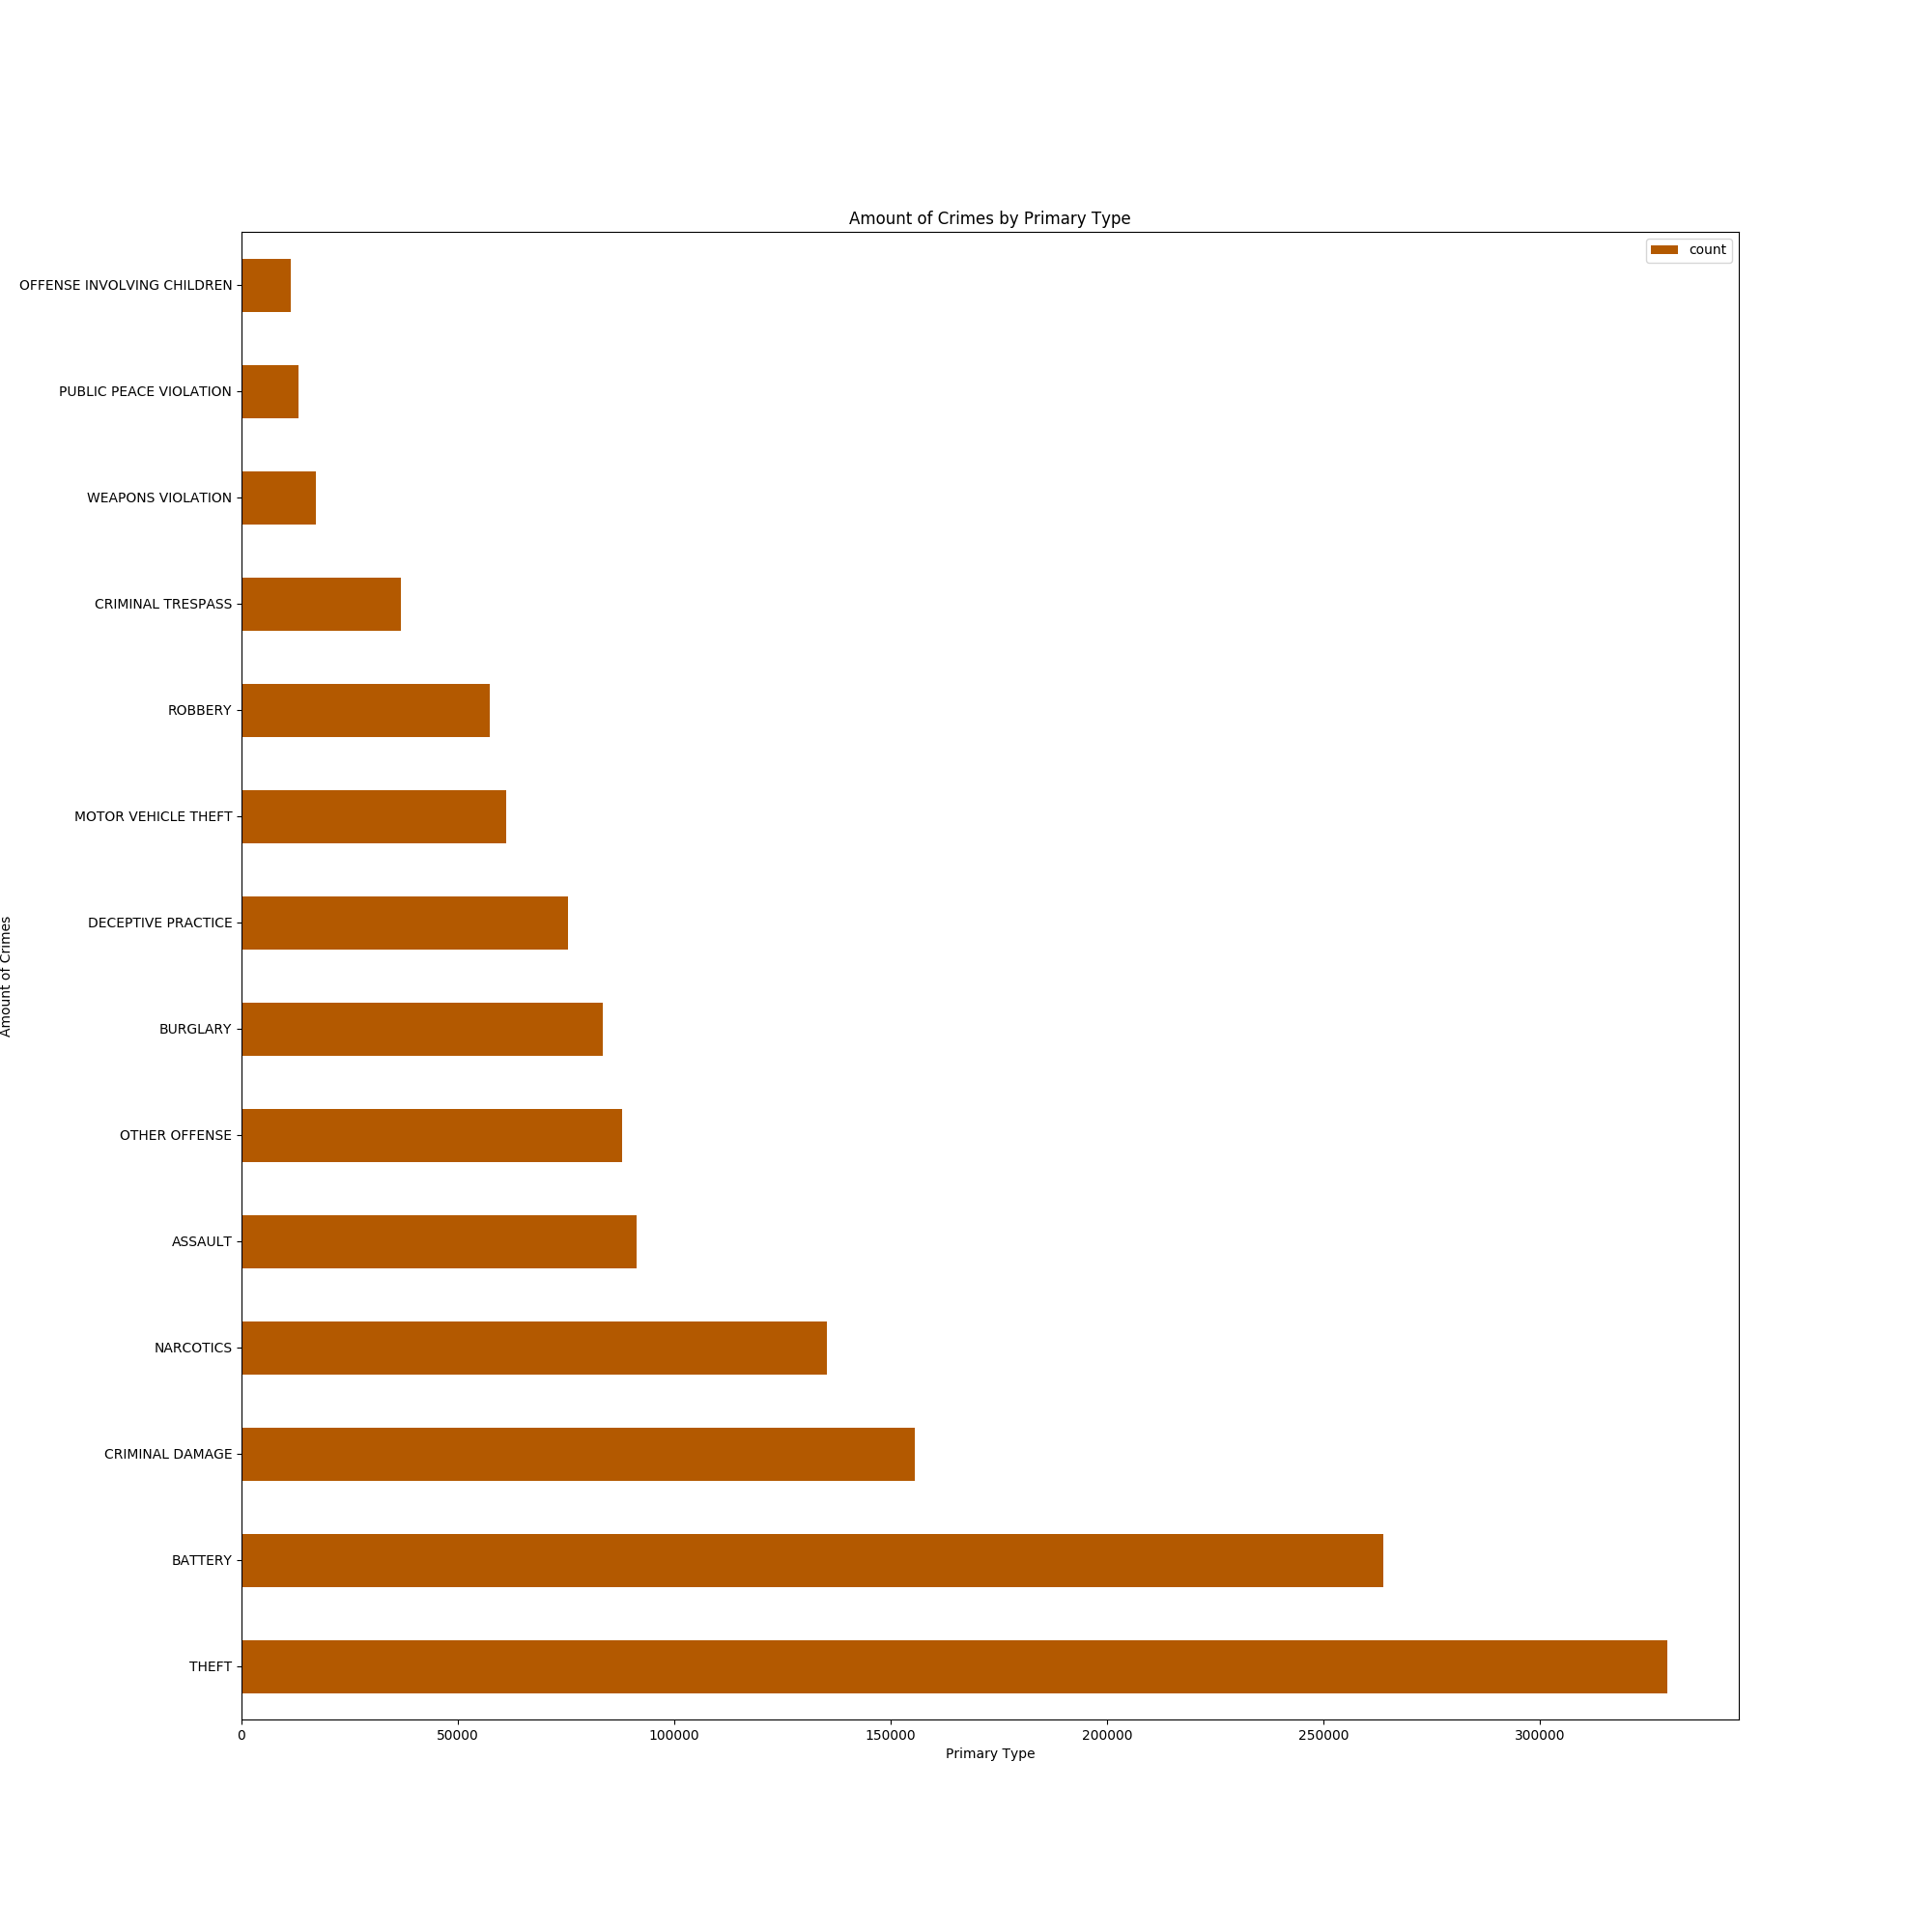

In [43]:
# create the plot


primarytype_df.head(14).plot(x = 'Primary Type', y = 'count', kind='barh',figsize=(20,20), color = "#b35900")



plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Amount of Crimes')
plt.xlabel('Primary Type')

# display the plot
%matplot plt



### Location Description statistical analysis

In [44]:
df.groupBy("Location Description").count().show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+
|Location Description| count|
+--------------------+------+
|            CAR WASH|   568|
|         CTA STATION|  1988|
|                null|  1658|
|  GROCERY FOOD STORE| 15999|
|LAKEFRONT/WATERFR...|   337|
|   RAILROAD PROPERTY|     1|
|            HOSPITAL|     2|
|ATM (AUTOMATIC TE...|  2589|
|       ATHLETIC CLUB|  2824|
|             LIBRARY|  1370|
|        CTA BUS STOP|  3600|
|               HOTEL|     3|
|               TRUCK|     1|
|       CHA APARTMENT|  4134|
|                YARD|    69|
|           RESIDENCE|233530|
|     BOAT/WATERCRAFT|   183|
|AIRPORT BUILDING ...|   414|
|HOSPITAL BUILDING...|  4970|
|       PARK PROPERTY| 12270|
+--------------------+------+
only showing top 20 rows

In [45]:
location_df = df.groupBy("Location Description").count().orderBy("count", ascending = False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
location_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Location Description   count
0               STREET  330471
1            RESIDENCE  233530
2            APARTMENT  185023
3             SIDEWALK  160891
4                OTHER   55774

### Top locations for most number of crime

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

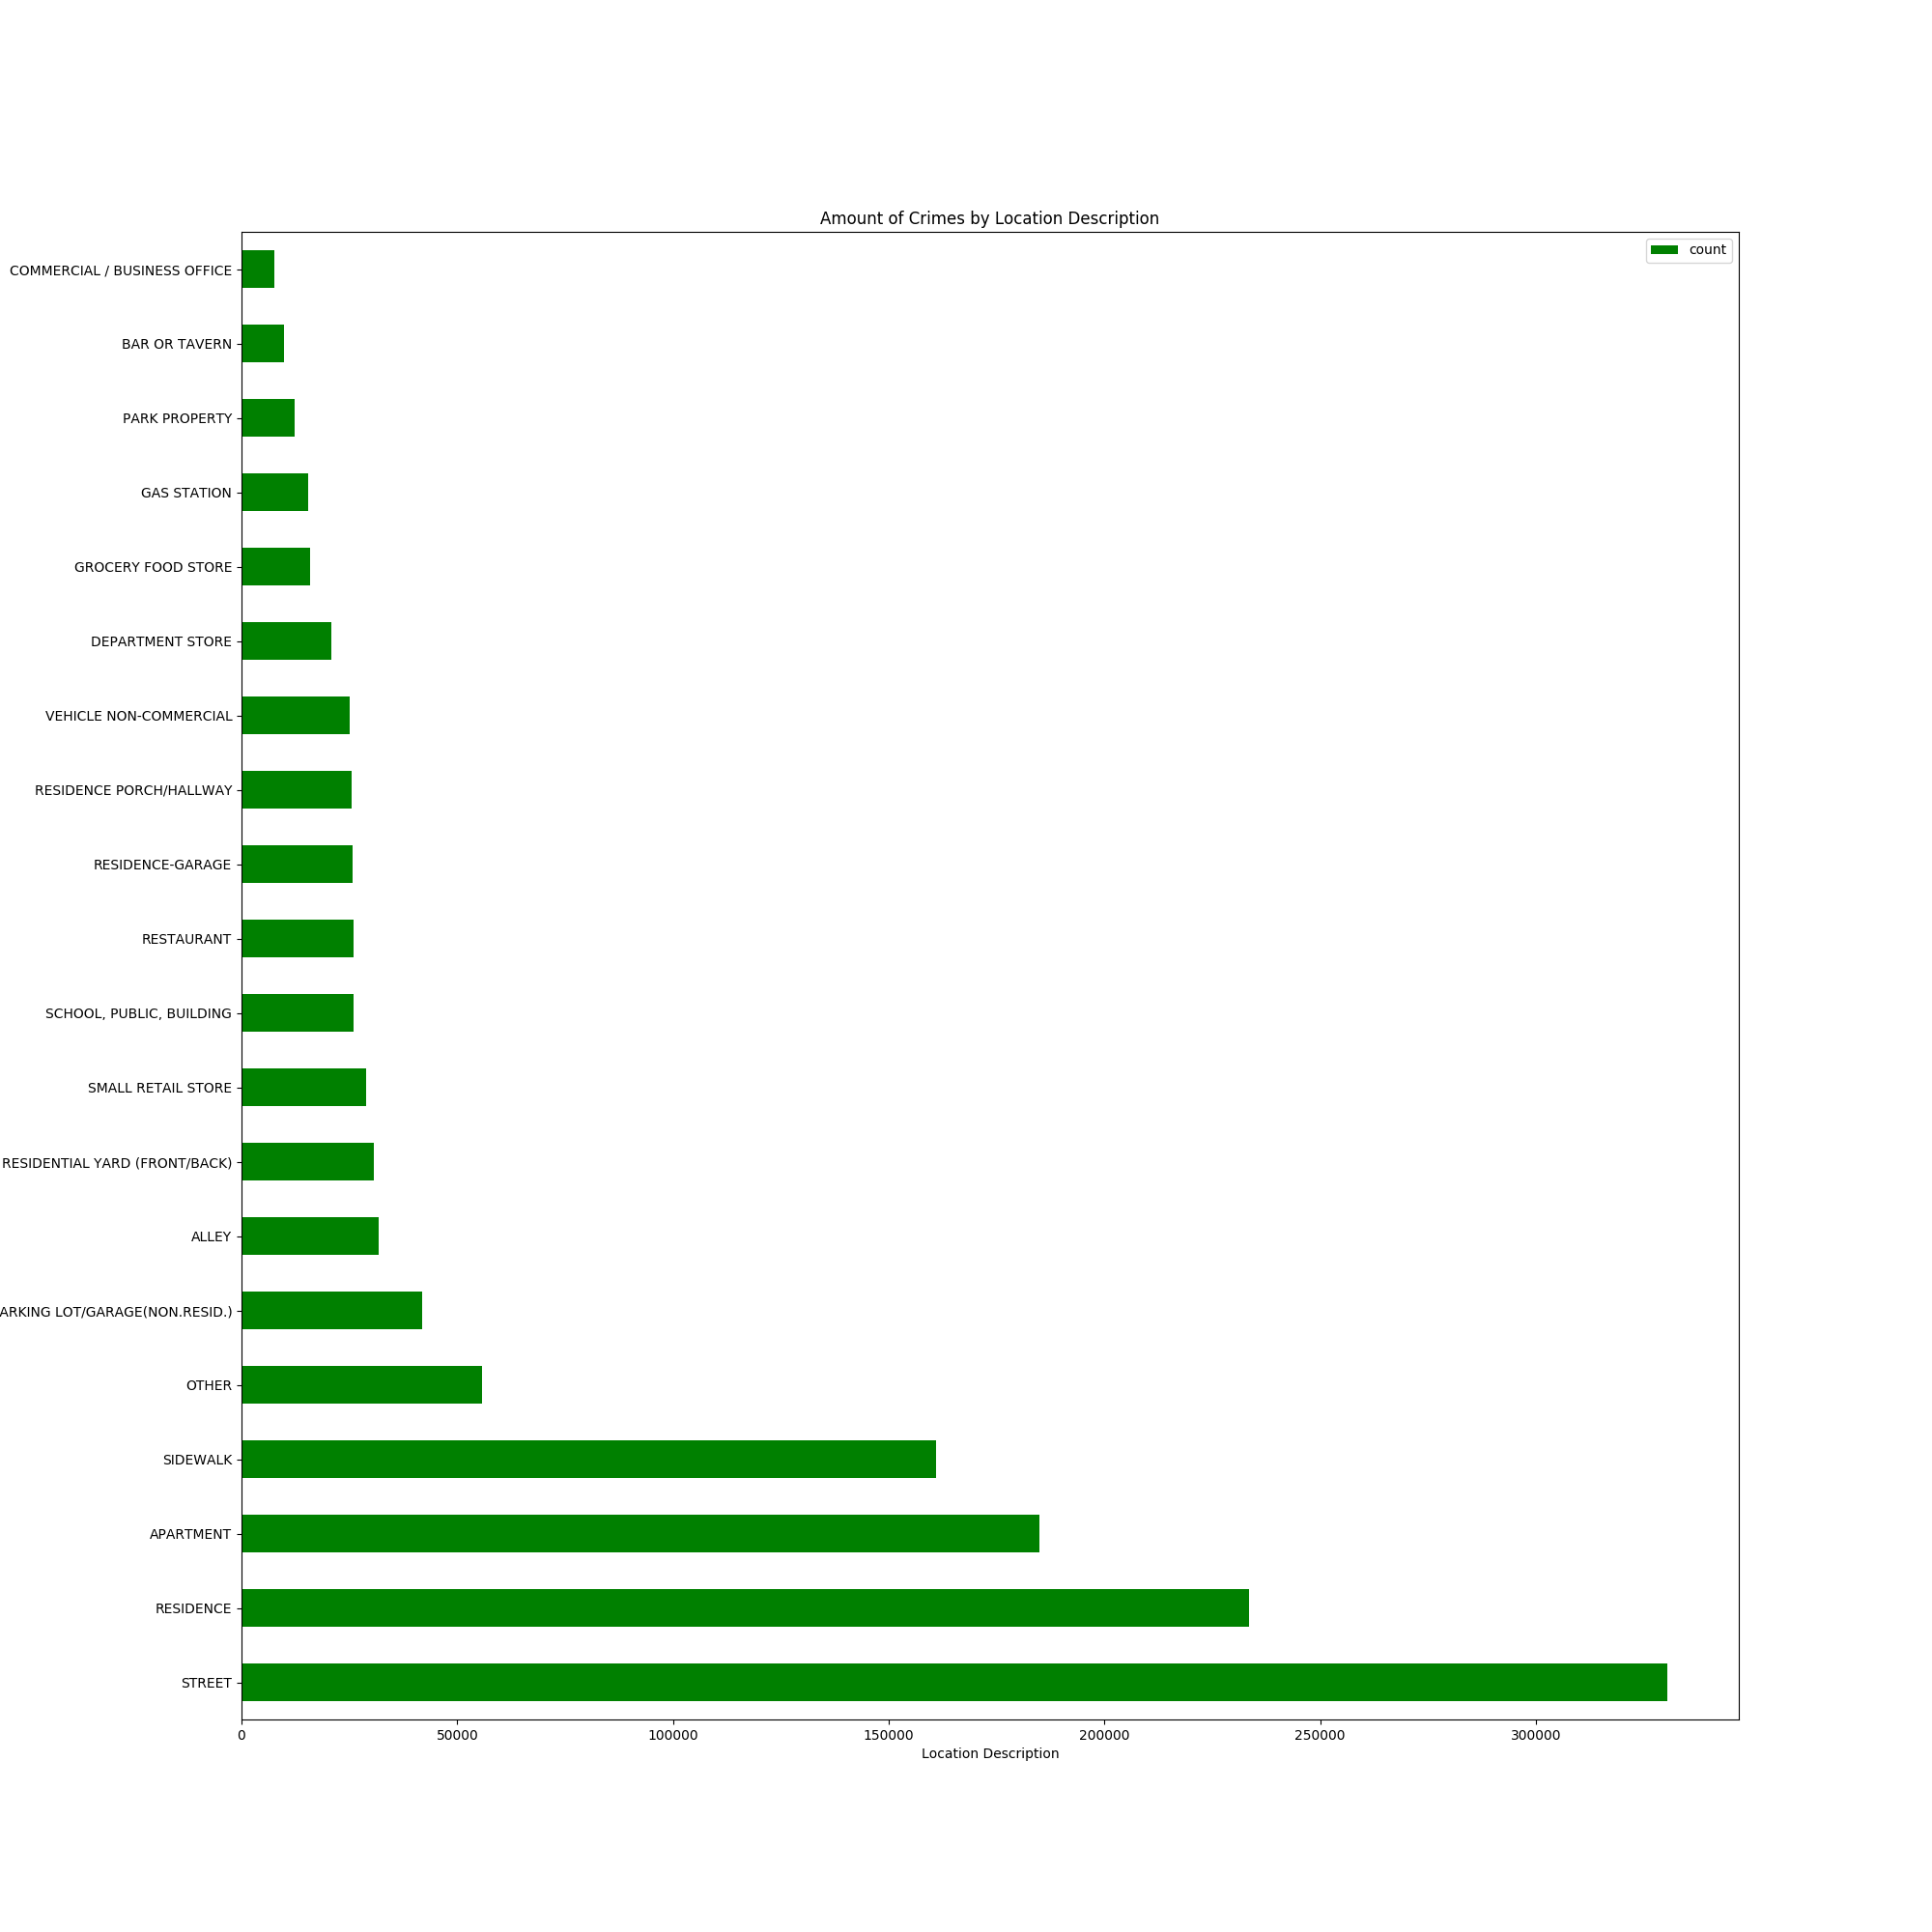

In [47]:
# create the plot


location_df.head(20).plot(x = 'Location Description', y = 'count', kind='barh',figsize=(20,20), color = "green")


plt.title('Amount of Crimes by Location Description')
plt.ylabel('Amount of Crimes')
plt.xlabel('Location Description')


# display the plot
%matplot plt


### How many arrests happened

In [48]:
df.groupBy('Arrest').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+
|Arrest|  count|
+------+-------+
|  True| 377472|
| False|1079242|
+------+-------+

### In what percentage of crime arrests happened?

In [49]:
df.filter(df["Arrest"]==True).count()/df.count() * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

25.912567600778193

### How many crimes are domestic

In [50]:
df.groupBy("Domestic").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-------+
|Domestic|  count|
+--------+-------+
|    True| 220054|
|   False|1236660|
+--------+-------+

### Calculating percentage of domestic crime

In [51]:
df.filter(df["Domestic"]==True).count()/df.count() * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

15.106191057407287

### How many narcotics cases are there in the dataset?

In [52]:
df.where(df["Primary Type"]=="NARCOTICS").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

135240

### Calculating percentage of narcotics cases in the dataset?

In [53]:
df.where(df["Primary Type"] == "NARCOTICS").count()/df.count() * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9.283908852389693

### How many domestic assualts there are?

In [54]:
df.filter((df["Primary Type"] == "ASSAULT") & (df["Domestic"] == "True")).count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

23099

### Calculating percentage of domestic assault cases in the dataset

In [55]:
df.filter((df["Primary Type"] == "ASSAULT") & (df["Domestic"] == "True")).count()/df.count() * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1.585692181169399

## Drop columns which are not required for model building

In [56]:
# show 5 rows
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------+-----------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+----+-----------+
|_c0|      ID|Case Number|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|hour|day_of_week|
+---+--------+-----------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+----+-----------+
|  3|10508693|   HZ250496| 013XX S SAWYER AVE|0486|             BATTERY|DOMESTIC BATTERY ...|           APARTMENT|  True|    Tr

In [57]:
# get columns
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['_c0', 'ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'hour', 'day_of_week']

**Dropping columns which are ID or numbers which won't help in model learning:**


'_c0', 'ID', 'Case Number': are IDs

'Block', 'Description' : Lots of text like address 

'Updated On' : no need 

'Location': combination of lat, long so no need

In [58]:
df = df.drop("_c0", "ID", "Case Number",'Block', 'Description', "Updated On", 'Location')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+------------+-------------+----+-----------+
|IUCR|        Primary Type|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|    Latitude|    Longitude|hour|day_of_week|
+----+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+------------+-------------+----+-----------+
|0486|             BATTERY|           APARTMENT|  True|    True|1022|    10.0|24.0|          29.0|     08B|   1154907.0|   1893681.0|2016|41.864073157|-87.706818608|  23|          3|
|0486|             BATTERY|           RESIDENCE| False|    True| 313|     3.0|20.0|          42.0|     08B|   1183066.0|   1864330.0|2016|41.782921527| -87.60436317|  21|          3|
|0470|PUBLIC PEACE VIOL...|              STREET| False|   False|1524|    15.0|37.0|  

In [60]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['IUCR', 'Primary Type', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'hour', 'day_of_week']

**Now we're left with lots of categorical columns, need to see how many distinct labels are there in each column, if the number of distinct labels are huge in a column, so during One-Hot_encoding need to create lots of new column.**

### Unique Values

In [61]:
for c in df.columns:
    print (c)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

IUCR
Primary Type
Location Description
Arrest
Domestic
Beat
District
Ward
Community Area
FBI Code
X Coordinate
Y Coordinate
Year
Latitude
Longitude
hour
day_of_week

In [62]:
# Checking the number distinct values in each attribute
from pyspark.sql.functions import col, countDistinct


df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------+---------+----+-----------+
|IUCR|Primary Type|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Latitude|Longitude|hour|day_of_week|
+----+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------+---------+----+-----------+
| 365|          33|                 142|     2|       2| 302|      24|  50|            78|      26|       67714|      111555|   6|  368076|   367942|  24|          7|
+----+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------+---------+----+-----------+

In [63]:
# get columns
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['IUCR', 'Primary Type', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'hour', 'day_of_week']

**Based on distinct count analysis, we can clearly decide on dropping few more columns, which is having huge distinct count, that many new columns needs to be cerated if we're considering that.**

***'IUCR', 'Beat','Ward','Community Area' : these columns can be dropped, this info can be inferred from the coordinates & lat, long columns, since they are more granular.***

In [64]:
df = df.drop('IUCR', 'Beat','Ward','Community Area')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+------------+-------------+----+-----------+
|        Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year|    Latitude|    Longitude|hour|day_of_week|
+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+------------+-------------+----+-----------+
|             BATTERY|           APARTMENT|  True|    True|    10.0|     08B|   1154907.0|   1893681.0|2016|41.864073157|-87.706818608|  23|          3|
|             BATTERY|           RESIDENCE| False|    True|     3.0|     08B|   1183066.0|   1864330.0|2016|41.782921527| -87.60436317|  21|          3|
|PUBLIC PEACE VIOL...|              STREET| False|   False|    15.0|      24|   1140789.0|   1904819.0|2016|41.894908283|-87.758371958|  23|          3|
|             BATTERY|            SIDEWALK| False|   False|    15.0|     08B|   11

In [66]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Primary Type', 'Location Description', 'Arrest', 'Domestic', 'District', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'hour', 'day_of_week']

#### Handling null values

In [67]:
# Counting the number of null values in each column
from pyspark.sql.functions import when, count, col, isnull


df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+--------------------+------+--------+--------+--------+------------+------------+----+--------+---------+----+-----------+
|Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year|Latitude|Longitude|hour|day_of_week|
+------------+--------------------+------+--------+--------+--------+------------+------------+----+--------+---------+----+-----------+
|           0|                1658|     0|       0|       1|       0|       37083|       37083|   0|   37083|    37083|   0|          0|
+------------+--------------------+------+--------+--------+--------+------------+------------+----+--------+---------+----+-----------+

**As we can see many row is not having the coordinates & lat, long details, without this info, it'll be diffcult to predict the FBI Code. So we'll drop these rows.**

In [68]:
# Dropping the rows with null values
df = df.na.drop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [69]:
# Check if the null values are dropped

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+--------------------+------+--------+--------+--------+------------+------------+----+--------+---------+----+-----------+
|Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year|Latitude|Longitude|hour|day_of_week|
+------------+--------------------+------+--------+--------+--------+------------+------------+----+--------+---------+----+-----------+
|           0|                   0|     0|       0|       0|       0|           0|           0|   0|       0|        0|   0|          0|
+------------+--------------------+------+--------+--------+--------+------------+------------+----+--------+---------+----+-----------+

In [70]:

print((df.count(), len(df.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(1418404, 13)

#### Correction in column type

In [71]:
# Column type
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Primary Type', 'string'), ('Location Description', 'string'), ('Arrest', 'string'), ('Domestic', 'string'), ('District', 'string'), ('FBI Code', 'string'), ('X Coordinate', 'string'), ('Y Coordinate', 'string'), ('Year', 'string'), ('Latitude', 'string'), ('Longitude', 'string'), ('hour', 'int'), ('day_of_week', 'int')]

In [72]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Primary Type: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- District: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)

In [73]:
df.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+------------+-------------+----+-----------+
|        Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year|    Latitude|    Longitude|hour|day_of_week|
+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+------------+-------------+----+-----------+
|             BATTERY|           APARTMENT|  True|    True|    10.0|     08B|   1154907.0|   1893681.0|2016|41.864073157|-87.706818608|  23|          3|
|             BATTERY|           RESIDENCE| False|    True|     3.0|     08B|   1183066.0|   1864330.0|2016|41.782921527| -87.60436317|  21|          3|
|PUBLIC PEACE VIOL...|              STREET| False|   False|    15.0|      24|   1140789.0|   1904819.0|2016|41.894908283|-87.758371958|  23|          3|
+--------------------+--------------------+------+--------+--------+--------+-----

**Need to change the data type of all lat, long, coordinates, district, year from String to Float/Integer**

In [74]:
# Changing the required columns from string type to numerical 
from pyspark.sql.types import FloatType, IntegerType


df = df.withColumn('District', df['District'].cast(IntegerType()))



df = df.withColumn('X Coordinate', df['X Coordinate'].cast(FloatType()))
df = df.withColumn('Y Coordinate', df['Y Coordinate'].cast(FloatType()))
df = df.withColumn('Longitude', df['Longitude'].cast(FloatType()))
df = df.withColumn('Latitude', df['Latitude'].cast(FloatType()))
df = df.withColumn('Year', df['Year'].cast(IntegerType()))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [75]:
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Primary Type', 'string'), ('Location Description', 'string'), ('Arrest', 'string'), ('Domestic', 'string'), ('District', 'int'), ('FBI Code', 'string'), ('X Coordinate', 'float'), ('Y Coordinate', 'float'), ('Year', 'int'), ('Latitude', 'float'), ('Longitude', 'float'), ('hour', 'int'), ('day_of_week', 'int')]

In [76]:
df.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+---------+----+-----------+
|        Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year| Latitude|Longitude|hour|day_of_week|
+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+---------+----+-----------+
|             BATTERY|           APARTMENT|  True|    True|      10|     08B|   1154907.0|   1893681.0|2016|41.864075|-87.70682|  23|          3|
|             BATTERY|           RESIDENCE| False|    True|       3|     08B|   1183066.0|   1864330.0|2016| 41.78292|-87.60436|  21|          3|
|PUBLIC PEACE VIOL...|              STREET| False|   False|      15|      24|   1140789.0|   1904819.0|2016| 41.89491|-87.75837|  23|          3|
+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+------

## Exploring the target variable: FBI Code

In [77]:
df.groupBy("FBI Code").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+
|FBI Code| count|
+--------+------+
|     01B|    12|
|     08B|222988|
|      18|125762|
|      26|134437|
|      06|321960|
|      15| 17070|
|     01A|  2578|
|      03| 56093|
|     04A| 23380|
|      13|   393|
|      14|152816|
|     08A| 66801|
|      22|  1928|
|      24| 17080|
|      07| 59858|
|      16|  7585|
|     04B| 35956|
|      17|  5387|
|      09|  2158|
|      20|  6303|
+--------+------+
only showing top 20 rows

In [78]:
# Storing in a pandas dataframe for visualisation
fbi_df = df.groupBy("FBI Code").count().orderBy("count", ascending = False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
fbi_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  FBI Code   count
0       06  321960
1      08B  222988
2       14  152816
3       26  134437
4       18  125762

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

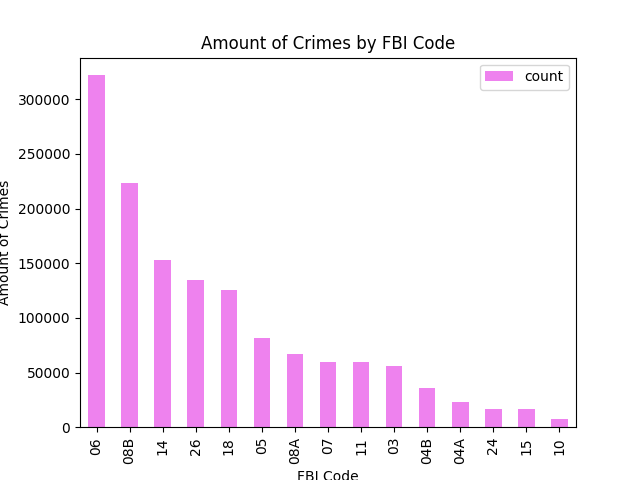

In [80]:
# create the plot
plt.figure(figsize=(14,10))

fbi_df.head(15).plot(x = 'FBI Code', y = 'count', kind='bar', color = "violet")

plt.title('Amount of Crimes by FBI Code')
plt.ylabel('Amount of Crimes')
plt.xlabel('FBI Code')


# display the plot
%matplot plt

## Feature Generation & Vector Creation

In [81]:
# Identifying the catrgorical columns for indexing
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Primary Type', 'Location Description', 'Arrest', 'Domestic', 'District', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'hour', 'day_of_week']

In [82]:
len(df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

13

In [83]:
df.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+---------+----+-----------+
|        Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year| Latitude|Longitude|hour|day_of_week|
+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+---------+----+-----------+
|             BATTERY|           APARTMENT|  True|    True|      10|     08B|   1154907.0|   1893681.0|2016|41.864075|-87.70682|  23|          3|
|             BATTERY|           RESIDENCE| False|    True|       3|     08B|   1183066.0|   1864330.0|2016| 41.78292|-87.60436|  21|          3|
|PUBLIC PEACE VIOL...|              STREET| False|   False|      15|      24|   1140789.0|   1904819.0|2016| 41.89491|-87.75837|  23|          3|
+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+------

In [84]:
# Storing the categorical and continuous columns in different lists


categorical_features = ['Primary Type', 'Location Description', 'Arrest', 'Domestic', 'District','Year','hour','day_of_week' ]


continuous_features = ['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Spark Pipeline concept will be used here

In [85]:
# Importing the libraries for data transormation
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [86]:
# Initialising the variable 'stages' to store every step for building a pipeline
stages = []

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### StringIndexer: Features which are in string are converted to numerical values

### OneHotEncoderEstimator: Converts categorical variable into new columns

In [87]:
# Building a function for encoding all the categorical variables


for categoricalCol in categorical_features:
    print(categoricalCol)
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + '_Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "_encoded"])    
    stages += [stringIndexer, encoder]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Primary Type
Location Description
Arrest
Domestic
District
Year
hour
day_of_week

In [88]:
# Encoding the target variable as label

label_stringIdx = StringIndexer(inputCol = 'FBI Code', outputCol = 'label')

stages += [label_stringIdx]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### VectorAssembler: Generated vectors for all the features

In [89]:
# Building a function for generating a vector of all features

assemblerInputs = [c + "_encoded" for c in categorical_features] + continuous_features


assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")


stages += [assembler]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Pipeline stages are used to run all Steps/stages

**Stages is a list of functions which is used as an input to the pipeline**

In [90]:
# Loading all the steps in a pipeline
from pyspark.ml import Pipeline


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [91]:
pipeline = Pipeline(stages = stages)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [92]:
pipeline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Pipeline_d9a0817245c7

### Fit & Transform DF

In [93]:
# Fitting the steps on the dataFrame
pipelineModel = pipeline.fit(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
# Transforming the dataframe
df = pipelineModel.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [95]:
# show rows
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+---------+----+-----------+------------------+--------------------+--------------------------+----------------------------+------------+--------------+--------------+----------------+--------------+----------------+----------+-------------+----------+---------------+-----------------+-------------------+-----+--------------------+
|        Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year| Latitude|Longitude|hour|day_of_week|Primary Type_Index|Primary Type_encoded|Location Description_Index|Location Description_encoded|Arrest_Index|Arrest_encoded|Domestic_Index|Domestic_encoded|District_Index|District_encoded|Year_Index| Year_encoded|hour_Index|   hour_encoded|day_of_week_Index|day_of_week_encoded|label|            features|
+--------------------+--------------------+------+--------+--------+--------+------------+--------

In [96]:
# Checking the schema of transformed dataFrame
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Primary Type: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- District: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: float (nullable = true)
 |-- Y Coordinate: float (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- Primary Type_Index: double (nullable = false)
 |-- Primary Type_encoded: vector (nullable = true)
 |-- Location Description_Index: double (nullable = false)
 |-- Location Description_encoded: vector (nullable = true)
 |-- Arrest_Index: double (nullable = false)
 |-- Arrest_encoded: vector (nullable = true)
 |-- Domestic_Index: double (nullable = false)
 |-- Domestic_encoded: vector (nullable = true)
 |-- District_Index: double (nullable = false)
 |

In [97]:
df.groupBy("label").count().orderBy("count", ascending = False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------+
|label| count|
+-----+------+
|  0.0|321960|
|  1.0|222988|
|  2.0|152816|
|  3.0|134437|
|  4.0|125762|
|  5.0| 81671|
|  6.0| 66801|
|  7.0| 59858|
|  8.0| 59250|
|  9.0| 56093|
| 10.0| 35956|
| 11.0| 23380|
| 12.0| 17080|
| 13.0| 17070|
| 14.0|  7783|
| 15.0|  7585|
| 16.0|  6756|
| 17.0|  6303|
| 18.0|  5387|
| 19.0|  2578|
+-----+------+
only showing top 20 rows

### Split data into train & test

In [98]:
# Splitting the dataFrame into training and testing set

train, test = df.randomSplit([0.7, 0.3], seed = 100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
print("Training Dataset Count: " + str(train.count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Training Dataset Count: 992707

In [100]:
print("Test Dataset Count: " + str(test.count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Dataset Count: 425697

## Spark Random Forest

In [101]:
from pyspark.ml.classification import RandomForestClassifier

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [102]:
# Building the RF model

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', \
                            maxDepth=5, impurity='gini', numTrees=25, seed=100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [103]:
# Fitting the model over the training set
rfmodel = rf.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [104]:
# Printing the forest obtained from the model
print(rfmodel.toDebugString)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

RandomForestClassificationModel (uid=RandomForestClassifier_5bf304ccd254) with 25 trees
  Tree 0 (weight 1.0):
    If (feature 3 in {0.0})
     If (feature 46 in {0.0})
      If (feature 38 in {0.0})
       If (feature 7 in {0.0})
        Predict: 0.0
       Else (feature 7 not in {0.0})
        Predict: 8.0
      Else (feature 38 not in {0.0})
       If (feature 12 in {0.0})
        If (feature 8 in {0.0})
         Predict: 9.0
        Else (feature 8 not in {0.0})
         Predict: 7.0
       Else (feature 12 not in {0.0})
        Predict: 12.0
     Else (feature 46 not in {0.0})
      If (feature 196 in {0.0})
       If (feature 197 in {0.0})
        Predict: 0.0
       Else (feature 197 not in {0.0})
        If (feature 172 in {0.0})
         Predict: 3.0
        Else (feature 172 not in {0.0})
         Predict: 0.0
      Else (feature 196 not in {0.0})
       Predict: 0.0
    Else (feature 3 not in {0.0})
     If (feature 180 in {0.0})
      Predict: 4.0
     Else (feature 180 not

### Model Prediction

In [105]:
# Applying the model on test set
predictions = rfmodel.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [106]:
predictions

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[Primary Type: string, Location Description: string, Arrest: string, Domestic: string, District: int, FBI Code: string, X Coordinate: float, Y Coordinate: float, Year: int, Latitude: float, Longitude: float, hour: int, day_of_week: int, Primary Type_Index: double, Primary Type_encoded: vector, Location Description_Index: double, Location Description_encoded: vector, Arrest_Index: double, Arrest_encoded: vector, Domestic_Index: double, Domestic_encoded: vector, District_Index: double, District_encoded: vector, Year_Index: double, Year_encoded: vector, hour_Index: double, hour_encoded: vector, day_of_week_Index: double, day_of_week_encoded: vector, label: double, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [107]:
predictions.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+--------------------+------+--------+--------+--------+------------+------------+----+---------+----------+----+-----------+------------------+--------------------+--------------------------+----------------------------+------------+--------------+--------------+----------------+--------------+----------------+----------+-------------+----------+---------------+-----------------+-------------------+-----+--------------------+--------------------+--------------------+----------+
|Primary Type|Location Description|Arrest|Domestic|District|FBI Code|X Coordinate|Y Coordinate|Year| Latitude| Longitude|hour|day_of_week|Primary Type_Index|Primary Type_encoded|Location Description_Index|Location Description_encoded|Arrest_Index|Arrest_encoded|Domestic_Index|Domestic_encoded|District_Index|District_encoded|Year_Index| Year_encoded|hour_Index|   hour_encoded|day_of_week_Index|day_of_week_encoded|label|            features|       rawPrediction|         probability|prediction|
+-----

In [108]:
# Printing the required columns
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
| 21.0|[6.05021141766362...|       0.0|[0.24200845670654...|
| 21.0|[6.05021141766362...|       0.0|[0.24200845670654...|
| 21.0|[6.05021141766362...|       0.0|[0.24200845670654...|
| 21.0|[6.05021141766362...|       0.0|[0.24200845670654...|
| 21.0|[5.93581567730825...|       0.0|[0.23743262709233...|
| 21.0|[6.05675176500675...|       0.0|[0.24227007060027...|
| 21.0|[6.47448647349559...|       0.0|[0.25897945893982...|
| 21.0|[6.05675176500675...|       0.0|[0.24227007060027...|
| 21.0|[5.66894319330882...|       0.0|[0.22675772773235...|
| 21.0|[5.66894319330882...|       0.0|[0.22675772773235...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows

### Model Evaluation

In [109]:
# Model evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [110]:

accuracy = evaluator.evaluate(predictions)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
# Model Accuracy
print(accuracy)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.8177717954319622

In [112]:
# Test Error
print("Test Error = %g" % (1.0 - accuracy))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Error = 0.182228

### Feature Importance

In [113]:
# Feature Importance
rfmodel.featureImportances

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparseVector(234, {0: 0.114, 1: 0.1292, 2: 0.1003, 3: 0.1216, 4: 0.0686, 5: 0.0218, 6: 0.1047, 7: 0.0458, 8: 0.0411, 9: 0.0451, 10: 0.0047, 11: 0.0158, 12: 0.0011, 13: 0.0021, 14: 0.0078, 15: 0.0021, 16: 0.0033, 17: 0.0012, 18: 0.0015, 19: 0.0003, 21: 0.0004, 24: 0.0, 32: 0.012, 33: 0.0052, 34: 0.007, 35: 0.0143, 37: 0.0004, 38: 0.0002, 40: 0.0012, 41: 0.0, 42: 0.0047, 43: 0.0005, 44: 0.0, 45: 0.0, 46: 0.0089, 47: 0.0012, 59: 0.0003, 62: 0.0001, 64: 0.0, 68: 0.0, 69: 0.0001, 73: 0.0, 80: 0.0, 82: 0.0, 88: 0.0, 171: 0.0577, 172: 0.0425, 173: 0.0006, 178: 0.0, 180: 0.0, 183: 0.0001, 185: 0.0002, 186: 0.0, 187: 0.0, 190: 0.0, 193: 0.0, 194: 0.0, 196: 0.0, 197: 0.0, 200: 0.0, 201: 0.0, 202: 0.0, 205: 0.0, 207: 0.0, 208: 0.0, 209: 0.0, 211: 0.0, 213: 0.0, 214: 0.0001, 215: 0.0, 216: 0.0, 217: 0.0, 218: 0.0, 220: 0.0001, 222: 0.0, 223: 0.0, 224: 0.0, 225: 0.0, 227: 0.0, 228: 0.0, 229: 0.0, 230: 0.0011, 231: 0.0057, 232: 0.0009, 233: 0.0019})

In [114]:
# Defining a function to extract features along with the feature importance score
import pandas as pd
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [115]:
# Printing the feature importance scores
ExtractFeatureImp(rfmodel.featureImportances, predictions, "features").head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     idx                                     name     score
5      1             Primary Type_encoded_BATTERY  0.129175
7      3           Primary Type_encoded_NARCOTICS  0.121632
4      0               Primary Type_encoded_THEFT  0.114001
10     6            Primary Type_encoded_BURGLARY  0.104741
6      2     Primary Type_encoded_CRIMINAL DAMAGE  0.100325
8      4             Primary Type_encoded_ASSAULT  0.068571
175  171                     Arrest_encoded_False  0.057704
11     7  Primary Type_encoded_DECEPTIVE PRACTICE  0.045768
13     9             Primary Type_encoded_ROBBERY  0.045117
176  172                   Domestic_encoded_False  0.042498